In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from IPython.core.pylabtools import figsize
from openpyxl.styles.builtins import total

In [2]:
df_path = Path.cwd() / '..' / 'data' / 'Advertising.csv'
df = pd.read_csv(df_path)

In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

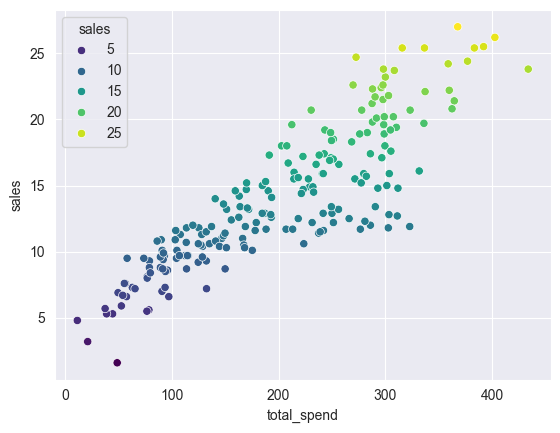

In [4]:
palate = sns.color_palette('viridis', as_cmap=True)
sns.scatterplot(data=df, x='total_spend', y='sales', hue='sales', palette=palate)

<Axes: xlabel='total_spend', ylabel='sales'>

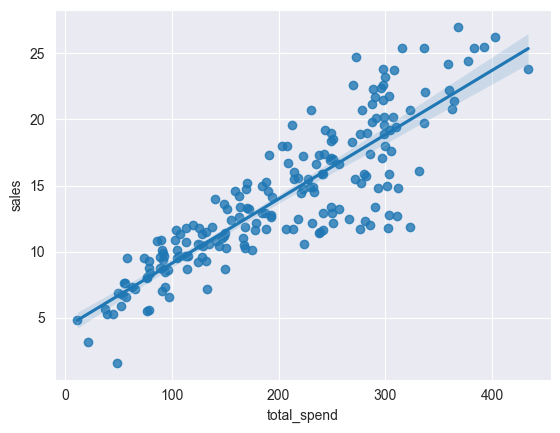

In [5]:
sns.regplot(data=df, x='total_spend', y='sales')

In [6]:
X = df['total_spend']

In [7]:
y = df['sales']

In [8]:
np.polyfit(X, y, 1)

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0, 500, 100)

In [10]:
X = df['total_spend']
y = df['sales']

In [11]:
potential_spend = np.linspace(0, 500, 100)

In [12]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

<Axes: xlabel='total_spend', ylabel='sales'>

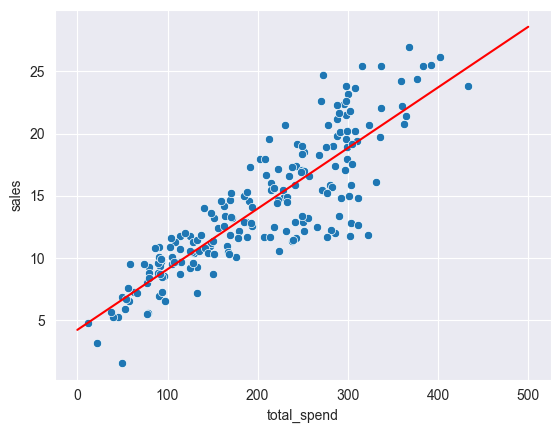

In [13]:
plt.plot(potential_spend, predicted_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

In [14]:
spend = 200
predicted_sales = 0.04868788 * spend + 4.24302822

In [15]:
predicted_sales

13.98060422

In [16]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
pot_spend = np.linspace(0, 500, 100)

In [18]:
predicted_sales = 3.07615033e-07 * pot_spend**3 - 0.00011948 * pot_spend**2 + 0.14394759 * pot_spend + 3.02976679

<Axes: xlabel='total_spend', ylabel='sales'>

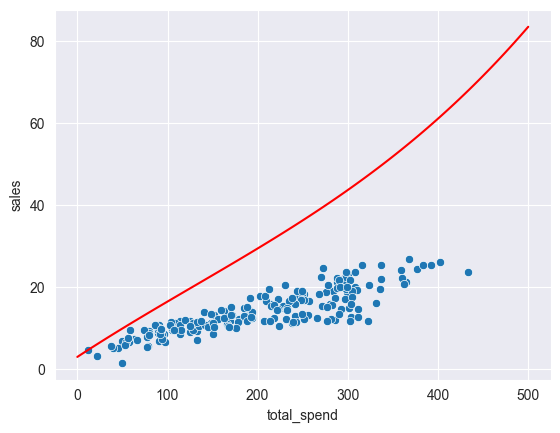

In [19]:
plt.plot(pot_spend, predicted_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

# 87. Overview of Scikit-Learn and Python

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

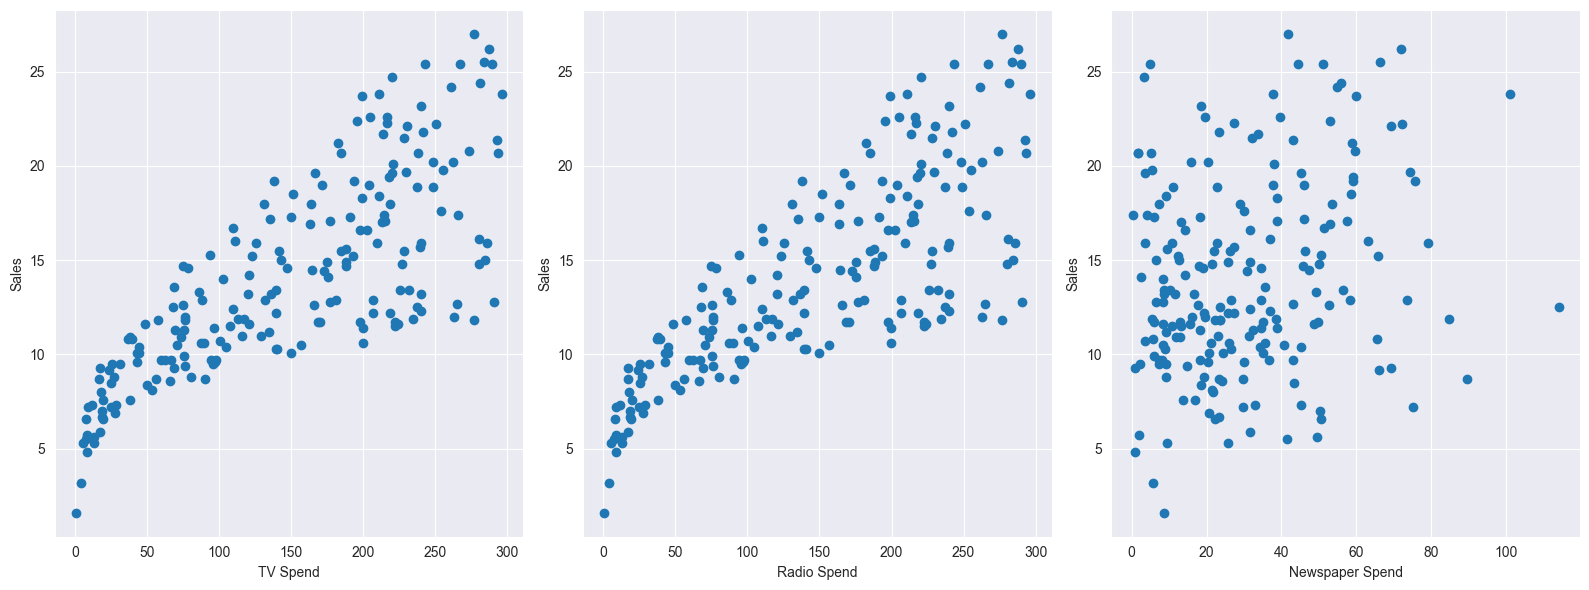

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['TV'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

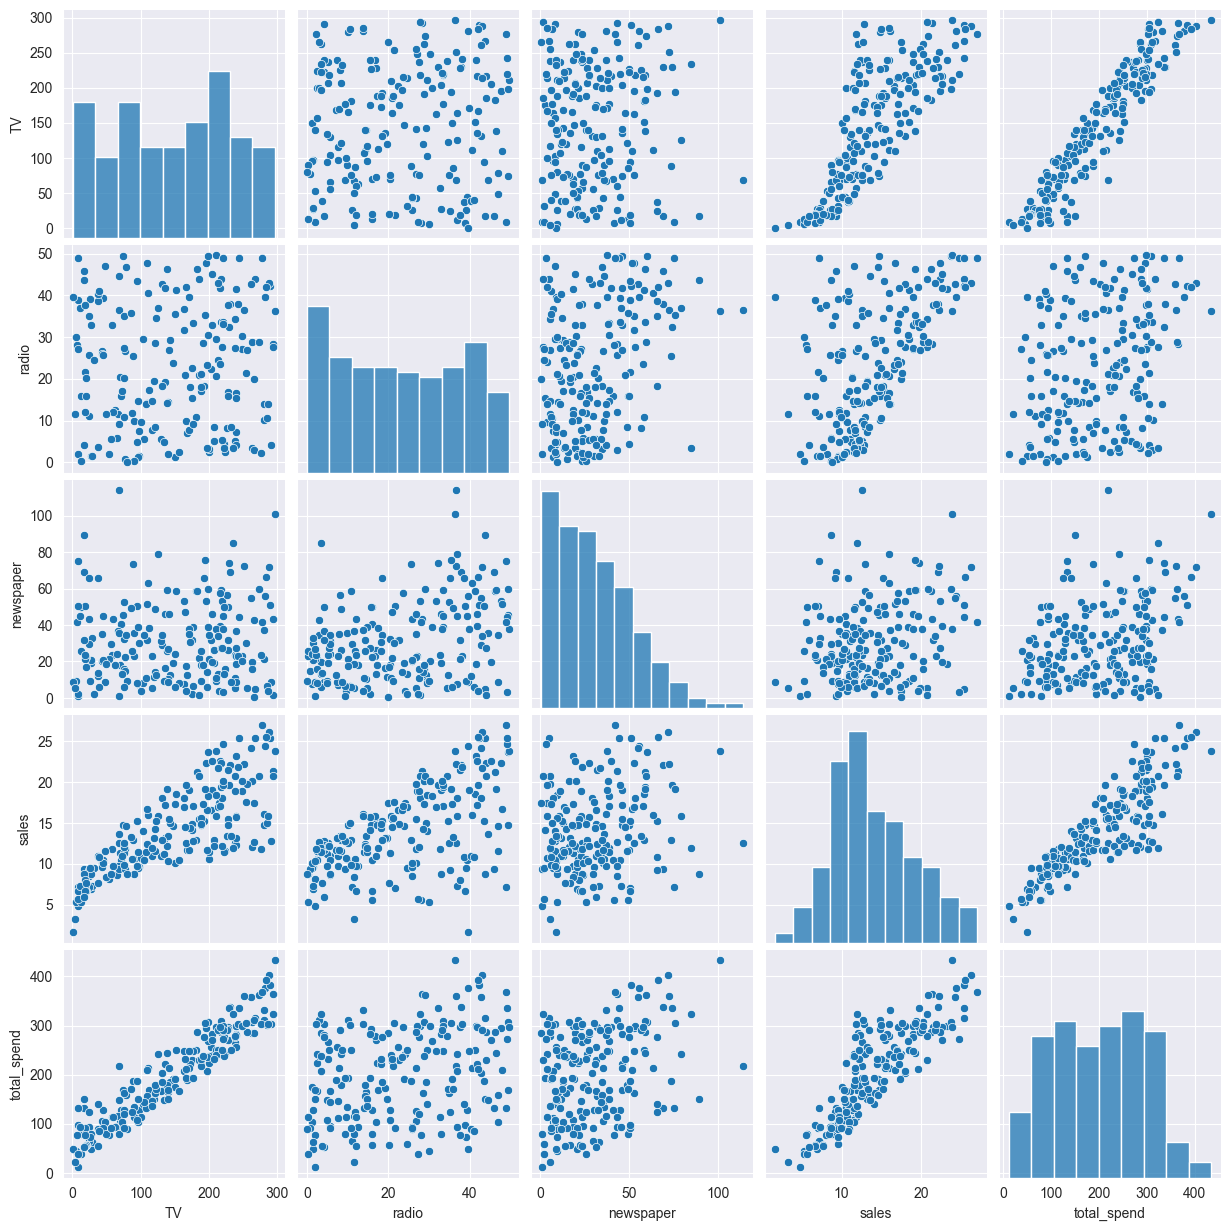

In [22]:
sns.pairplot(df)

In [23]:
X = df.drop('sales', axis=1)

In [24]:
y = df['sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 89. Linear Regression - Scikit-Learn Performance Evaluation - Regression

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
test_predictions = model.predict(X_test)

In [29]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

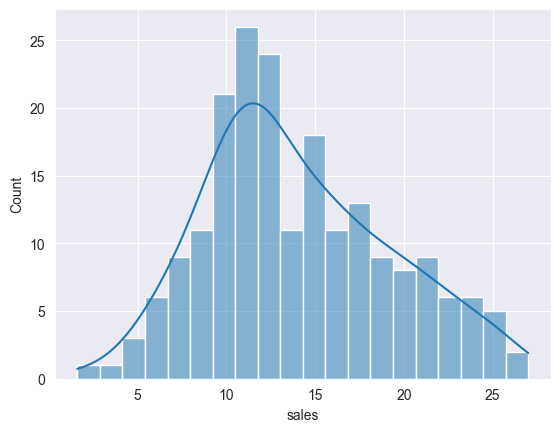

In [30]:
sns.histplot(data=df, x='sales', bins=20, kde=True)

In [31]:
mean_absolute_error(y_test, test_predictions)

1.5116692224549084

In [32]:
np.sqrt(mean_absolute_error(y_test, test_predictions))

1.229499582128806

# 90. Linear Regression - Residual Plots

In [33]:
import scipy as sp

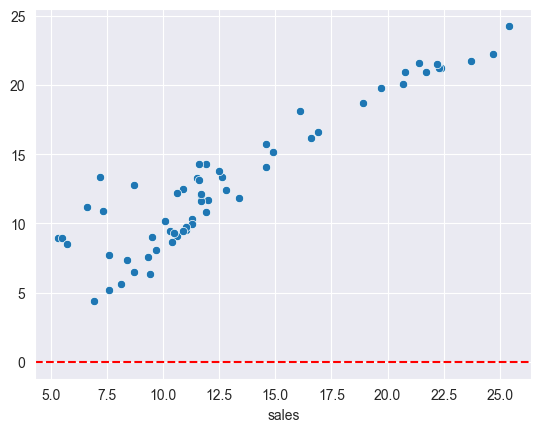

In [34]:
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test, y=test_predictions)
plt.axhline(y=0, color='red', ls='--')

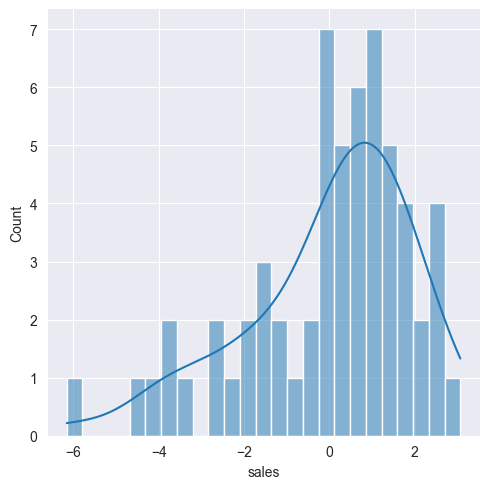

In [35]:
sns.displot(test_residuals, bins=25, kde=True)

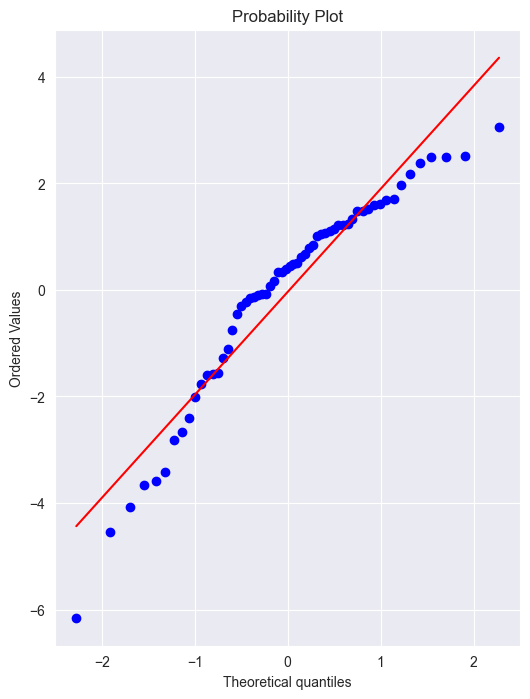

In [36]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

# 91. Linear Regression - Model Deployment and Coefficient Interpretation

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [38]:
X = df.drop('sales', axis=1)

In [39]:
y = df['sales']

In [40]:
final_model = LinearRegression()

In [41]:
final_model.fit(X, y)

LinearRegression()

In [42]:
final_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [43]:
y_hat = final_model.predict(X)

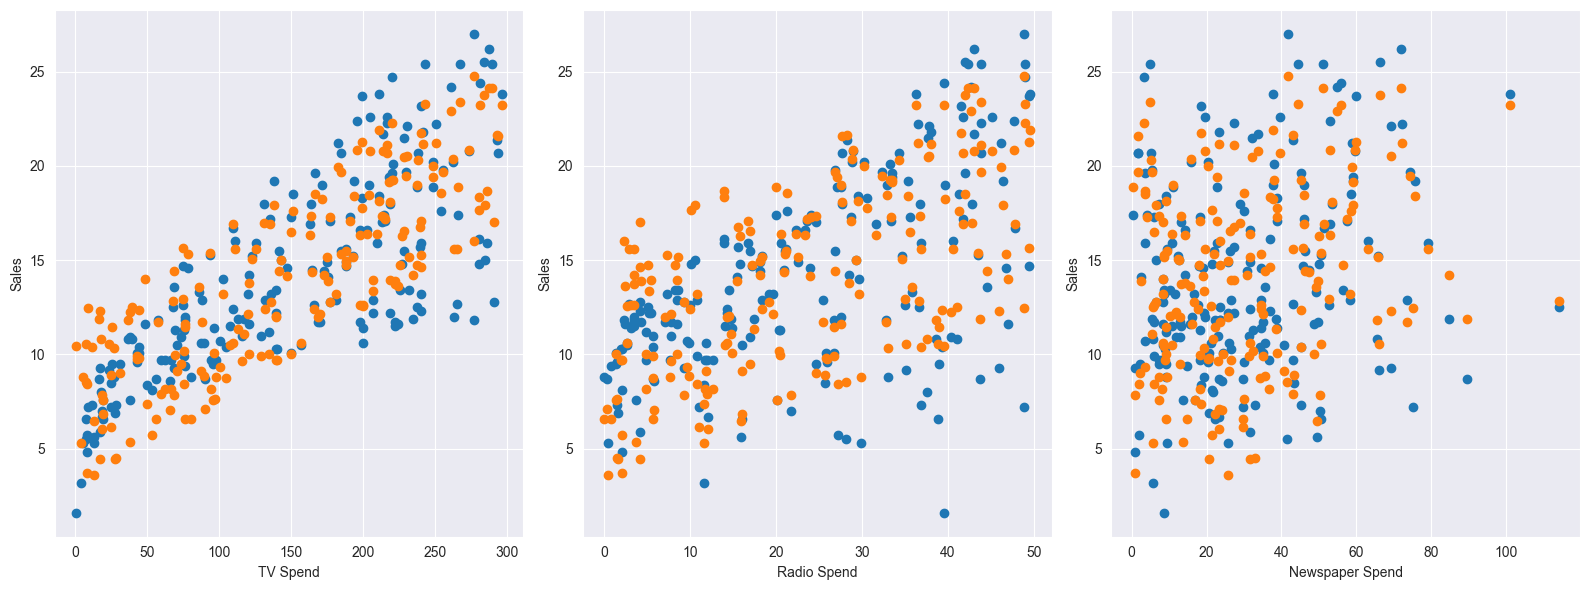

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

In [45]:
from joblib import dump, load

In [46]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

In [47]:
loaded_model = load('sales_model.joblib')

In [48]:
loaded_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

# 93. Polynomial Regression - Creating Polynomial Features

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [50]:
X = df.drop('sales', axis=1)

In [51]:
y = df['sales']

In [52]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [53]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [54]:
poly_features = polynomial_converter.transform(X)

In [55]:
poly_features[0]

array([2.3010000e+02, 3.7800000e+01, 6.9200000e+01, 3.3710000e+02,
       5.2946010e+04, 8.6977800e+03, 1.5922920e+04, 7.7566710e+04,
       1.4288400e+03, 2.6157600e+03, 1.2742380e+04, 4.7886400e+03,
       2.3327320e+04, 1.1363641e+05])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [61]:
test_predictions = model.predict(X_test)

In [62]:
model.coef_

array([-1.11304453e+06, -1.11304457e+06, -1.11304457e+06,  1.11304458e+06,
        7.67295122e+07,  1.84822204e+07, -6.11794505e+06, -3.02642664e+08,
       -5.82472917e+07, -1.41094749e+08, -1.67665860e+08, -8.28474572e+07,
       -1.43065695e+08,  2.25913152e+08])

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
MAE = mean_absolute_error(y_test, test_predictions)

In [65]:
MSE = mean_squared_error(y_test, test_predictions)

In [66]:
RMSE = np.sqrt(MSE)

In [67]:
print(f'MAE {MAE}, MSE {MSE} RMSE {RMSE}')

MAE 0.49039766002836677, MSE 0.4424786687969736 RMSE 0.6651907010752433


In [68]:
model.coef_

array([-1.11304453e+06, -1.11304457e+06, -1.11304457e+06,  1.11304458e+06,
        7.67295122e+07,  1.84822204e+07, -6.11794505e+06, -3.02642664e+08,
       -5.82472917e+07, -1.41094749e+08, -1.67665860e+08, -8.28474572e+07,
       -1.43065695e+08,  2.25913152e+08])

In [69]:
X.iloc[0]

TV             230.1
radio           37.8
newspaper       69.2
total_spend    337.1
Name: 0, dtype: float64

# 96. Polynomial Regression - Choosing Degree of Polynomial

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):

    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [72]:
pd.Series(train_rmse_errors)

0    1.734594
1    0.588214
2    0.433934
3    0.351709
4    0.250936
5    0.199665
6    0.213037
7    0.203068
8    0.236799
dtype: float64

In [73]:
pd.Series(test_rmse_errors)

0        1.516152
1        0.665191
2        0.580329
3        0.507788
4        2.575177
5        2.087760
6      103.838711
7     2002.343974
8    58318.004512
dtype: float64

# 97. Polynomial Regression - Model Deployment

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
X = df.drop('sales', axis=1)
y = df['sales']

In [76]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [77]:
poly_features = polynomial_converter.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
test_predictions = model.predict(X_test)

In [82]:
MAE = mean_absolute_error(y_test, test_predictions)

In [83]:
MSE = mean_squared_error(y_test, test_predictions)

In [84]:
RMSE = np.sqrt(MSE)

In [85]:
print(f'MAE {MAE}, MSE {MSE}, RMSE {RMSE}')

MAE 0.4127516085337191, MSE 0.33678137975394706, RMSE 0.580328682518749


In [86]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [87]:
final_model = LinearRegression()

In [88]:
full_converted_X = final_poly_converter.fit_transform(X)

In [89]:
final_model.fit(full_converted_X, y)

LinearRegression()

In [90]:
from joblib import dump, load

In [91]:
dump(final_model, 'poly_model.joblib')

['poly_model.joblib']

In [92]:
dump(final_poly_converter, 'poly_converter.joblib')

['poly_converter.joblib']

In [93]:
loaded_converter = load('poly_converter.joblib')

In [94]:
loaded_model = load('poly_model.joblib')

In [95]:
df_path = r'F:\DataSpell\data_science_ml_learning\Section 10 Linear Regression\data\Advertising.csv'

In [96]:
df = pd.read_csv(df_path)

In [97]:
X = df.drop('sales', axis=1)

In [98]:
y = df['sales']

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [101]:
poly_features = polynomial_converter.fit_transform(X)

In [102]:
poly_features.shape

(200, 19)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [104]:
X_train.shape

(140, 19)

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
scaler.fit(X_train)

StandardScaler()

In [108]:
X_train = scaler.transform(X_train)

In [109]:
X_test = scaler.transform(X_test)

In [110]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [111]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [113]:
X = df.drop('sales', axis=1)
y = df['sales']

In [114]:
poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [115]:
poly_features = poly_converter.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [117]:
scaler = StandardScaler()

In [118]:
X_train = scaler.fit_transform(X_train)

In [119]:
X_test = scaler.transform(X_test)

In [120]:
ridge_model = Ridge(alpha=10)

In [121]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [122]:
test_predictions = ridge_model.predict(X_test)

In [123]:
MAE = mean_absolute_error(y_test, test_predictions)

In [124]:
MSE = mean_squared_error(y_test, test_predictions)

In [125]:
RMSE = np.sqrt(MSE)

In [126]:
print(f'MAE {MAE}, MSE {MSE}, RMSE {RMSE}')

MAE 0.5774404204714166, MSE 0.8003783071528348, RMSE 0.8946386461319648


In [127]:
test_predictions

array([13.7469803 , 19.17764   , 11.8623393 , 16.25574551,  8.92891155,
        8.04595366, 20.13320851, 16.94847676, 10.29219174, 19.78365691,
       10.31758361, 13.44077317, 12.24228062, 23.23864236, 19.12656362,
        9.748809  , 12.84361521,  9.14248129,  8.82504966, 21.46989971,
        8.25222201, 18.8110776 , 28.39227333, 25.06911066,  9.11912241,
       11.8071711 , 20.85199462,  9.31962495, 12.25122303,  9.07811198,
        9.25275556, 19.87154568, 10.55955497,  7.86818084, 17.67220132,
        9.31442423, 10.1539168 ,  9.47802944,  8.63337302, 10.76209179,
       11.63848891, 10.38883411, 10.90270005,  8.40019284, 11.35336224,
       10.3514086 ,  8.00082147, 15.27139854, 12.94761469, 22.49762978,
       10.80165407, 13.01337743, 14.82204895, 11.37354043, 11.69628953,
        7.20576885, 25.53512232, 10.41926545, 17.38798022, 15.10158819])

In [128]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [129]:
ridge_model.coef_

array([ 2.11063462,  0.62207087,  0.06822351,  0.20543482,  1.83561135,
        0.33399306,  0.02544162,  0.15472622, -0.02220834, -0.62586462,
        0.41216201, -0.49628796,  1.11873234,  0.24222164, -0.00821273,
       -0.20160416, -0.14825878, -0.06688285, -0.06004278])

In [130]:
from sklearn.linear_model import RidgeCV

In [131]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [132]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [133]:
ridge_cv_model.alpha_

0.1

In [134]:
test_predictions = ridge_cv_model.predict(X_test)

In [135]:
MAE = mean_absolute_error(y_test, test_predictions)

In [136]:
MSE = mean_squared_error(y_test, test_predictions)

In [137]:
RMSE = np.sqrt(MSE)

In [138]:
print(f'MAE {MAE}, MSE {MSE}, RMSE {RMSE}')

MAE 0.42737748843375084, MSE 0.38201298815109863, RMSE 0.6180719926926787


In [139]:
from sklearn.linear_model import LassoCV

In [140]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [141]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [142]:
lasso_cv_model.alpha_

0.4943070909225831

In [143]:
test_predictions = lasso_cv_model.predict(X_test)

In [144]:
MAE = mean_absolute_error(y_test, test_predictions)

In [145]:
MSE = mean_squared_error(y_test, test_predictions)

In [146]:
RMSE = np.sqrt(MSE)

In [147]:
print(f'MAE {MAE}, MSE {MSE}, RMSE {RMSE}')

MAE 0.6541723161252868, MSE 1.2787088713079886, RMSE 1.1308001022762548


In [148]:
from sklearn.linear_model import ElasticNetCV

In [149]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, max_iter=100000)

In [150]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000)

In [151]:
elastic_model.l1_ratio_

1.0

In [152]:
elastic_model.alpha_

0.004943070909225831

In [153]:
lasso_cv_model.alpha_

0.4943070909225831

In [154]:
test_predictions = elastic_model.predict(X_test)

In [155]:
MAE = mean_absolute_error(y_test, test_predictions)

In [156]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [157]:
print(f'MAE {MAE}, RMSE {RMSE}')

MAE 0.4335034618590074, RMSE 0.6063140748984036
